# Seattle Airbnb exploration

## By (Ali Yasser)

## Introduction:

The following analysis is done on the Seattle Airbnb dataset, which is a collection of data that provides information about Airbnb listings in Seattle city. It includes various details about the listings, such as the property type, neighborhood, price, availability, and host information.

The Seattle Airbnb dataset contains a lot of valuable information which can help hosts imporve their ratings by telling them what exactly do people look for when looking through Airbnb to find place to spend a couple of nights or even longer. Were going to go through the data and try to answer some questions that may strike the interest of both hosts and customers at the same time.


## What is the average price of Airbnb listings in Seattle?


In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [34]:
def load_dataset(file_path):
    """
    This function loads a dataset into the Jupyter Notebook.
    
    parameters:
        file_path (str): The path to the dataset file.
    
    Returns:
        pandas.DataFrame: The loaded dataset as a Pandas DataFrame.
    """
    dataset = pd.read_csv(file_path)
    return dataset


In [28]:
# load dataset
data = load_dataset("/python311/dataset/listings.csv")
df = pd.DataFrame(data = data)
pd.set_option("display.max_columns",None)

Let's first take a quick overview of the data trying make sense of what it contains and try to identify features of interest that will help us find asnwers to out question.

In [29]:
# quick overview of the data
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

(3818, 92)

In [5]:
# Check to see how many missing values are there
null_data = df.isnull().sum()
null_data['property_type']

1

Since there is only 1 missing value in property type, we can simply drop it without any worries that it might mess with the outcome

In [6]:
df = df.dropna(subset=['property_type'])
df['property_type'].isnull().sum()

0

In [7]:
# convert price column to numeric so we can change the datatype into int
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])
df['price'] = df['price'].astype(int)

In [8]:
# group properties by price and calculate the average for each property type
average_property_price = df.groupby('property_type')['price'].mean()


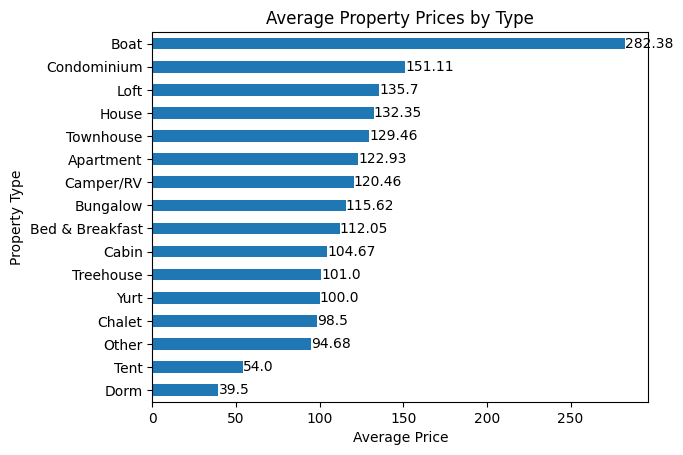

In [9]:
# plot the average price for each property type and arrange descendingly

average_property_price_sorted = average_property_price.sort_values(ascending=True)
ax = average_property_price_sorted.plot.barh()

# Add values on top of each bar
for i, v in enumerate(average_property_price_sorted):
    ax.text(v, i, str(round(v,2)), ha='left', va='center')

plt.xlabel('Average Price')
plt.ylabel('Property Type')
plt.title('Average Property Prices by Type')

plt.show()

We observe that boats tend to be the most expensive property type. This could be due to the fact that it is mobile. While dorms, tents and all the kind of properties one would assume are relatevly tighter in space are the cheapest types of properties.

## Predicting the price based on the property features (Bedrooms, Bathrooms,...etc)

Let's see if we can build a model that could help us predict the price based on what features are offered in the property. It would make sense that the more offered, the higher the price. But this model will not take into consideration all factors such as location, season, or neighbours. But rather factors that can be somehow controlled by the host. Such features could be number of bathrooms, number of bedrooms, and amenities.

To be specific, let's use the data mentioed-above (Bedrooms, Bathrooms, ameneties) to predict the price. we will need to perform some cleaning and wrangling before we can proceed with building the model.

In [10]:
# See how much missing data we will need to handel
null_data[['bathrooms','bedrooms','amenities']]

bathrooms    16
bedrooms      6
amenities     0
dtype: int64

Luckily we don't have a lot of missing data. Like done before, we will drop all the rows containing missing values then proceed.

In [11]:
df = df.dropna(subset=['bathrooms','bedrooms','amenities'])
df[['bathrooms','bedrooms','amenities']].isnull().sum()

bathrooms    0
bedrooms     0
amenities    0
dtype: int64

In [12]:
# Create a new column to count the number of amenities
df['amenities_count'] = df['amenities'].replace('[{}"]', '').str.split(",").apply(len)
df['amenities_count']

0       10
1       16
2       21
3       14
4       13
        ..
3813    16
3814    17
3815    20
3816    11
3817    22
Name: amenities_count, Length: 3795, dtype: int64

Now that we have all our variable ready, let's start building the model that predicts prices of properties.

In [13]:
#Split into explanatory and response variables
x = df[['bedrooms', 'bathrooms', 'amenities_count']]
y = df['price']

In [14]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state=42)

# create an instance of the LinearRegression model
lm_model = LinearRegression()
lm_model.fit(x_train,y_train) # fit the model

LinearRegression()

In [15]:
# test and score the model
y_train_pred = lm_model.predict(x_train)
test_r2 = r2_score(y_train, y_train_pred)
print("Test R^2 Score:", test_r2)

Test R^2 Score: 0.4244762426216586


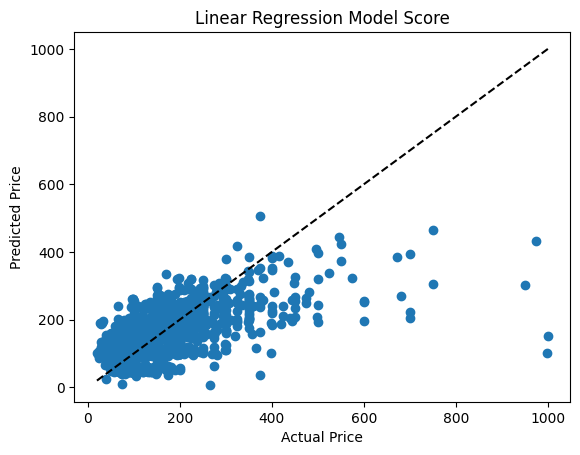

In [16]:
plt.scatter(y_train,y_train_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Model Score')
plt.show()


From what we see, there is a positive coorelation between the price and all the other factors provided. meaning that the price is likly to be higher as the number of bedroom, bathrooms, as well as how many amenities the property provides increase. Of course it goes without saying, the more you give, the more you receive. 

Now to explain the graph presented above, it shows the result of the prediction model deployed. Put simply, we fed the model multiple features (Number of bedrooms, bathrooms, and amenities) to see if it could the price based on those features. The result was 43% accurate. the results are skewed due to some outliers that needed to be dealt with beforehand. Those outliers either had an unusally high price with very little to show for it, or the other way around. Of course our prediction can be further improved if we give the model more features to predict on. But generaly said, and as we mentioed above, this is to set expecations for both hosts and guests in terms of what price to expect for what one might be looking for.

##  What are the busiest times of the year for Airbnb rentals in Seattle?

To get to know what are the busiest times of the year, let's import a dataset that has the availabilty dates for each listing.

In [30]:
# import the calendar dataset as cal_df

data_2 = load_dataset("/python311/dataset/calendar.csv")
cal_df = pd.DataFrame(data_2)
cal_df.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [18]:
# remove the price column as it is not needed
cal_df = cal_df.drop(['price'],axis=1)
cal_df.head()

,listing_id,date,available
0,241032,2016-01-04,t
1,241032,2016-01-05,t
2,241032,2016-01-06,f
3,241032,2016-01-07,f
4,241032,2016-01-08,f


In [19]:
#convert the date column to datetime format
cal_df['date'] = pd.to_datetime(cal_df['date'])
cal_df.head()

,listing_id,date,available
0,241032,2016-01-04,t
1,241032,2016-01-05,t
2,241032,2016-01-06,f
3,241032,2016-01-07,f
4,241032,2016-01-08,f


In [20]:
#extract the months from the date column
cal_df['month'] = cal_df['date'].dt.strftime('%B')
cal_df.head()

,listing_id,date,available,month
0,241032,2016-01-04,t,January
1,241032,2016-01-05,t,January
2,241032,2016-01-06,f,January
3,241032,2016-01-07,f,January
4,241032,2016-01-08,f,January


In [21]:
# remove the rows where the listing is not available and keep only the count of availabilities 
cal_df = cal_df[cal_df['available'] != 'f']

In [22]:
value_counts = cal_df['month'].value_counts()
value_counts = value_counts.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

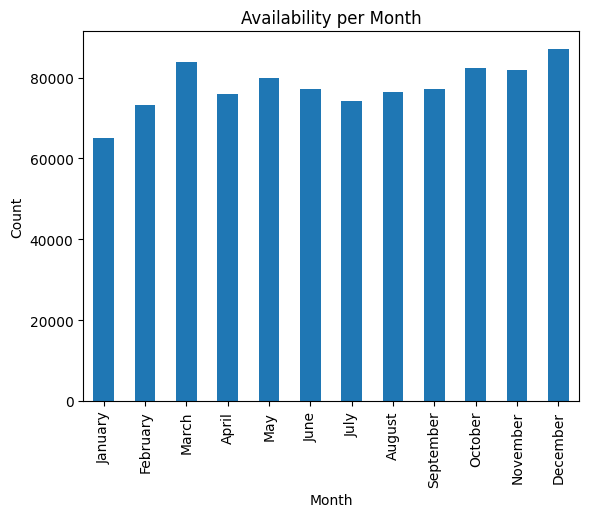

In [23]:
#plot the count of availabilities per month
value_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Availability per Month')
plt.show()

The above graph represents the amount of availabilities per month. This means that the less the count of availabilities, the busier the month. It apperas to be that January is the busiest during the whole year while December and April appear to by not very busy compared to January.

Now how does this help hosts or guests in any way? First of all, let's bare in mind that Seattle is not particularly cold duing winter season comapred to other states. With temperature ranging between 7-15 Celsus, Seattle is considered fairly warm which could mean that it usually lists on the top destinations for any one planning a get-away during the winter season.

Secondly, Seattle has wonderful landscapes and is known to be very relaxing. Keeping those facts in mind can help hosts target the right customers by building a branding image for seattle as a distinctive travelling destination.